Model accuracy: 0.9374837872892348


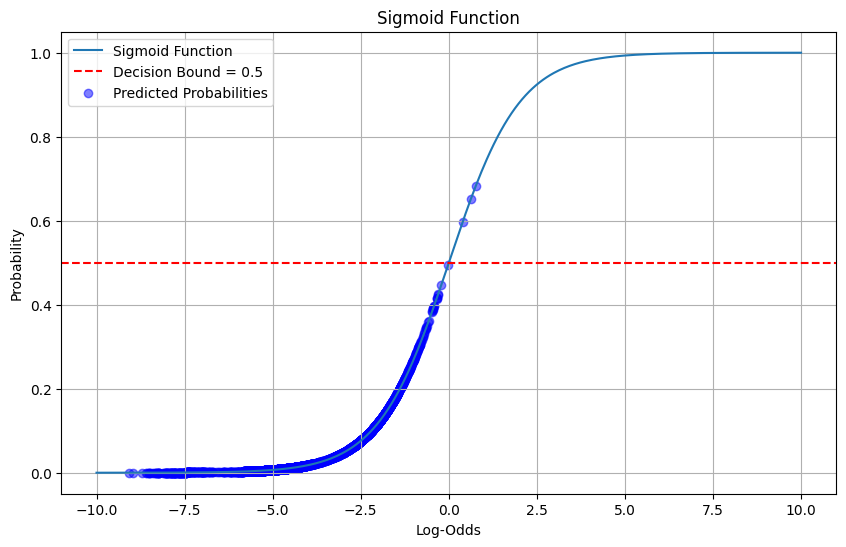

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'fraud_oracle.csv'
data = pd.read_csv(file_path)

# One-hot encode
data_encoded = pd.get_dummies(data, drop_first=True)

# Define the target variable and features
target = 'FraudFound_P'
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Split the dataset into training and testing sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Min-Max Scaler on input attributes
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Get the predicted probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for the sigmoid function plot
x_values = np.linspace(-10, 10, 400)
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Bound = 0.5')
plt.scatter(np.log(y_prob / (1 - y_prob)), y_prob, color='blue', alpha=0.5, label='Predicted Probabilities')
plt.title('Sigmoid Function')
plt.xlabel('Log-Odds')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


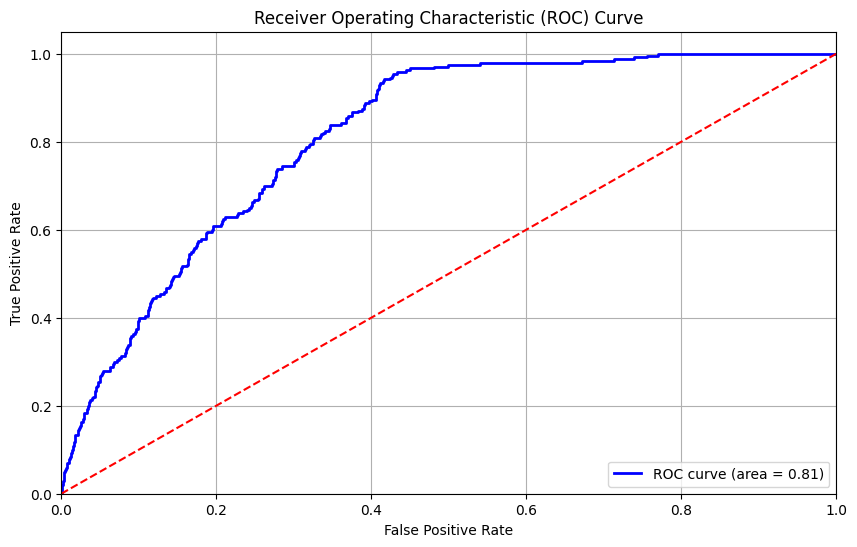

In [2]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 

In [4]:
import pickle

with open('models/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)